# ML Activity 2 : Perceptron
### Find a decision line across the space to separate classes
I used features nomalized hue and round

In [2]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
# loading the dataset again
df= pd.read_excel('perceptron_features.xlsx')
df.head(5)

,Unnamed: 0,StDev,Median,AR,Skew,Round,Class,Normalized Hue
0,0,35.793,183.0,1.688,-0.679,0.593,Mango,0.623942
1,1,14.205,175.0,1.727,-0.416,0.579,Mango,0.480354
2,2,20.652,158.0,1.729,-0.553,0.578,Mango,0.627035
3,3,30.002,110.0,1.446,0.831,0.692,Mango,0.350753
4,4,19.470,171.0,1.553,-0.438,0.644,Mango,0.553311


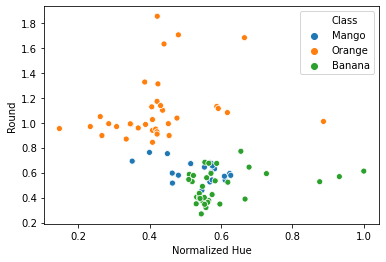

In [4]:
sns.scatterplot(data=df, x='Normalized Hue', y='Round', hue='Class')
plt.savefig('newfeatures.png')

Let's first choose two classes: Mango (1) and Orange (-1)

In [5]:
perceptron1_df = pd.DataFrame(df)

# Get names of indexes to drop
indexNames = perceptron1_df[perceptron1_df['Class'] == 'Banana'].index

# Delete these row indexes from dataFrame
perceptron1_df.drop(indexNames , inplace=True)

# Replacing Mango and Orange with 1 and -1
perceptron1_df = perceptron1_df.replace(['Mango','Orange'], [-1,1])

perceptron1_df.head(5)

,Unnamed: 0,StDev,Median,AR,Skew,Round,Class,Normalized Hue
0,0,35.793,183.0,1.688,-0.679,0.593,-1,0.623942
1,1,14.205,175.0,1.727,-0.416,0.579,-1,0.480354
2,2,20.652,158.0,1.729,-0.553,0.578,-1,0.627035
3,3,30.002,110.0,1.446,0.831,0.692,-1,0.350753
4,4,19.470,171.0,1.553,-0.438,0.644,-1,0.553311


In [6]:
# initialize number of iterations and learning rate (eta)
eta = 0.01
n_iter = 50

# load X and d
X = perceptron1_df[['Normalized Hue', 'Round']]
X.insert(0,'Bias',1)
print('X shape:', X.shape)
d = np.array(perceptron1_df['Class'])
d = np.reshape(d, (len(d),1))
print('d shape:', d.shape)

X.head(5)

X shape: (70, 3)
d shape: (70, 1)


,Bias,Normalized Hue,Round
0,1,0.623942,0.593
1,1,0.480354,0.579
2,1,0.627035,0.578
3,1,0.350753,0.692
4,1,0.553311,0.644


In [7]:
# define z function
def Z(X,w):
    """
    outputs the Z with shape (n_features,1)
    """   
    a = np.dot(X,w)
        
    z = []
    for ai in a:
        if ai >= 0:
            z.append(1)
        else:
            z.append(-1)             
    z = np.array(z)
    z = np.reshape(z, (X.shape[0],1))
    
    return np.array(z)

In [10]:
Z(X,w).shape

(70, 1)

In [8]:
# define weight calculation function
def w_delta(Z, D, X):
    delta = (d - Z) * eta * X
    delta = delta.mean(axis=0)
    return delta

Now that we have all the needed functions, we initialze the lists we need and do the loops

In [9]:
w = np.zeros((X.shape[1],1))  # shape = (3,1)

for i in range(n_iter):
    z = Z(X,w)
    w_new = np.array(w_delta(z, d, X))
    w_new = w_new.reshape((w_new.shape[0],1))
    w += w_new

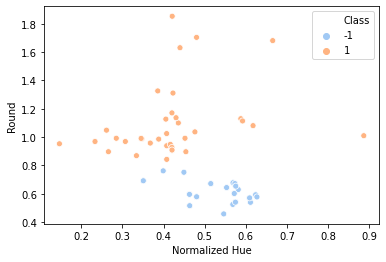

In [9]:
# plot of the two classes
p1_plot = sns.scatterplot(data=perceptron1_df, x='Normalized Hue', y='Round',
                palette='pastel', hue='Class')


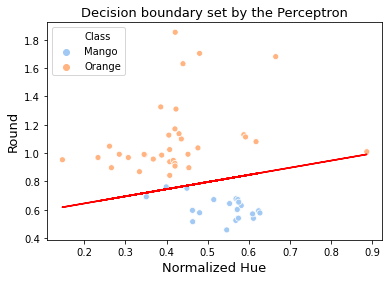

In [10]:
# plotting the decision line using the weights
C = w[0]
A = w[1]
B = w[2]

# plot equation of line
u = X['Normalized Hue']
v = -(C/B) - ((A/B)*u)


# plt.scatter(X['Normalized Hue'], X['Round'] )
p1_plot = sns.scatterplot(data=perceptron1_df, x='Normalized Hue', y='Round',
                palette='pastel', hue='Class')
p1_plot.set_xlabel('Normalized Hue', fontsize=13)
p1_plot.set_ylabel('Round', fontsize=13)
L = plt.legend(loc='upper left')
L.get_texts()[1].set_text('Mango')
L.get_texts()[2].set_text('Orange')
plt.plot(u, v, '-r')
plt.title('Decision boundary set by the Perceptron', fontsize=13)
plt.savefig('perceptron1.png')
plt.show()

In [11]:
# if the resulting v is positive then it's considered to be class 1 otherwise -1
test_val = w[0] + (w[1] * X['Normalized Hue']) + (w[2] * X['Round'])
test = []
for i in test_val:
    if i >= 0:
        test.append(1)
    else:
        test.append(-1)
test = np.array(test)
test.reshape((test.shape[0],1))

# testing accuracy
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(d,test))


Accuracy:  0.9857142857142858


In [13]:
# for graphing accuracy vs. n iterations
n_iter = np.arange(1,65,1)
accuracy = []

for i in n_iter:
    w = np.zeros((X.shape[1],1))  # shape = (3,1)
    
    for j in range(i):
        z = Z(X,w)
        w_new = np.array(w_delta(z, d, X))
        w_new = w_new.reshape((w_new.shape[0],1))
        w += w_new
        
    test_val = w[0] + (w[1] * X['Normalized Hue']) + (w[2] * X['Round'])
    test = []
    for i in test_val:
        if i >= 0:
            test.append(1)
        else:
            test.append(-1)
    test = np.array(test)
    test.reshape((test.shape[0],1))
    
    accuracy.append(accuracy_score(d,test))

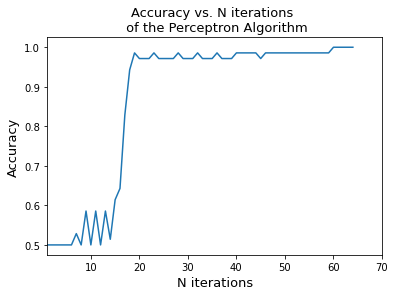

In [14]:
plt.plot(n_iter,accuracy)
plt.xlim(1,70)
plt.xlabel('N iterations', fontsize=13)
plt.ylabel('Accuracy', fontsize=13)
plt.title('Accuracy vs. N iterations \n of the Perceptron Algorithm',
          fontsize=13)
plt.savefig('accuracy_model.png')

In [462]:
accuracy

[0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5285714285714286,
 0.5,
 0.5857142857142857,
 0.5,
 0.5857142857142857,
 0.5,
 0.5857142857142857,
 0.5142857142857142,
 0.6142857142857143,
 0.6428571428571429,
 0.8285714285714286,
 0.9428571428571428,
 0.9857142857142858,
 0.9714285714285714,
 0.9714285714285714,
 0.9714285714285714,
 0.9857142857142858,
 0.9714285714285714,
 0.9714285714285714,
 0.9714285714285714,
 0.9714285714285714,
 0.9857142857142858,
 0.9714285714285714,
 0.9714285714285714,
 0.9714285714285714,
 0.9857142857142858,
 0.9714285714285714,
 0.9714285714285714,
 0.9714285714285714,
 0.9857142857142858,
 0.9714285714285714,
 0.9714285714285714,
 0.9714285714285714,
 0.9857142857142858,
 0.9857142857142858,
 0.9857142857142858,
 0.9857142857142858,
 0.9857142857142858,
 0.9714285714285714,
 0.9857142857142858,
 0.9857142857142858,
 0.9857142857142858,
 0.9857142857142858,
 0.9857142857142858,
 0.9857142857142858,
 0.9857142857142858,
 0.9857142857142858,
 0.9857142857142858,
 